In [2]:
import pandas as pd

In [3]:
# 讀取資料
data = pd.read_csv("application_train.csv")

In [4]:
# 查看資料形狀
data.shape

(307511, 122)

In [5]:
# 查看總共欄位
len(data.columns)

122

In [6]:
# 查看欄位資料型態
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
# 計算空值站欄位的百分比
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
# Missing values statistics
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
missing_values = missing_values_table(data)
print(missing_values)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.
                              Missing Values  % of Total Values
COMMONAREA_MEDI                       214865               69.9
COMMONAREA_AVG                        214865               69.9
COMMONAREA_MODE                       214865               69.9
NONLIVINGAPARTMENTS_MEDI              213514               69.4
NONLIVINGAPARTMENTS_MODE              213514               69.4
NONLIVINGAPARTMENTS_AVG               213514               69.4
FONDKAPREMONT_MODE                    210295               68.4
LIVINGAPARTMENTS_MODE                 210199               68.4
LIVINGAPARTMENTS_MEDI                 210199               68.4
LIVINGAPARTMENTS_AVG                  210199               68.4
FLOORSMIN_MODE                        208642               67.8
FLOORSMIN_MEDI                        208642               67.8
FLOORSMIN_AVG                         208642               67.8
YEARS_BUILD_MODE

## 檢查REGION_POPULATION_RELATIVE的異常值缺失值

In [9]:
data['REGION_POPULATION_RELATIVE'].min() #檢查人口密度有沒有負的

0.00029

## 檢查DAYS_BIRTH的異常值缺失值

In [10]:
(data['DAYS_BIRTH']/-365).describe() #查看出生天數有沒有異常值

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

## 處理DAYS_EMPLOYED的異常值缺失值

In [11]:
(data['DAYS_EMPLOYED']/-365).describe() #查看工作天數異常值

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [12]:
error = data[data['DAYS_EMPLOYED']>0] #檢查是否異常值都是365243,答案：是
error['DAYS_EMPLOYED'].drop_duplicates()

8    365243
Name: DAYS_EMPLOYED, dtype: int64

In [13]:
error1 = error.groupby('DAYS_EMPLOYED').size() #總共有55374筆365243
error1

DAYS_EMPLOYED
365243    55374
dtype: int64

In [14]:
print(len(error['DAYS_EMPLOYED']))

55374


In [15]:
data['DAYS_EMPLOYED_ANOM'] = data["DAYS_EMPLOYED"] == 365243

In [16]:
print(data['DAYS_EMPLOYED_ANOM'])

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507     True
307508    False
307509    False
307510    False
Name: DAYS_EMPLOYED_ANOM, Length: 307511, dtype: bool


In [17]:
print(data["DAYS_EMPLOYED"])

0           -637
1          -1188
2           -225
3          -3039
4          -3038
           ...  
307506      -236
307507    365243
307508     -7921
307509     -4786
307510     -1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64


In [18]:
# 把非365243的列挑出來取中位數，為了填補原本是異常值(365243的列)
non_anom = data["DAYS_EMPLOYED"].apply(lambda x:0 if x==365243 else x)
print(non_anom.median()) 

-1213.0


In [19]:
# 將異常值填上該欄的中位數
data['DAYS_EMPLOYED'].replace({365243: -1213.0}, inplace = True)

In [20]:
print(data['DAYS_EMPLOYED'])

0         -637
1        -1188
2         -225
3        -3039
4        -3038
          ... 
307506    -236
307507   -1213
307508   -7921
307509   -4786
307510   -1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64


## 檢查DAYS_REGISTRATION的異常值缺失值

In [21]:
(data['DAYS_REGISTRATION']/-365).describe() #查看註冊資料更改天數異常值

count    307511.000000
mean         13.660604
std           9.651743
min          -0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

In [22]:
(data['DAYS_ID_PUBLISH']/-365).describe() #查看身分資料更改天數異常值

count    307511.000000
mean          8.203294
std           4.135481
min          -0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: DAYS_ID_PUBLISH, dtype: float64

In [23]:
(data['OWN_CAR_AGE']).describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

In [24]:
(data['DAYS_LAST_PHONE_CHANGE']/-365).describe()

count    307510.000000
mean          2.637969
std           2.265229
min          -0.000000
25%           0.750685
50%           2.073973
75%           4.301370
max          11.758904
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [25]:
# 計算缺失值百分比
pd.set_option('display.max_rows', None) # 想看到完整的資訊
missing_percent = data.isnull().sum()/data.shape[0]*100
missing_percent2 = missing_percent[ missing_percent > 0 ]
print(missing_percent2)
print(f'how many columns have missing values : {missing_percent2.shape[0]}')

AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_1                    56.381073
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50

In [26]:
# 選那些 missing values > 0 的欄位
mask = data.loc[:,data.isnull().sum()>0]
print(mask.info())
# 選擇不是object的數值型欄位
data_nobject = mask.loc[:,mask.dtypes!='object']
data_nobject.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 67 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AMT_ANNUITY                   307499 non-null  float64
 1   AMT_GOODS_PRICE               307233 non-null  float64
 2   NAME_TYPE_SUITE               306219 non-null  object 
 3   OWN_CAR_AGE                   104582 non-null  float64
 4   OCCUPATION_TYPE               211120 non-null  object 
 5   CNT_FAM_MEMBERS               307509 non-null  float64
 6   EXT_SOURCE_1                  134133 non-null  float64
 7   EXT_SOURCE_2                  306851 non-null  float64
 8   EXT_SOURCE_3                  246546 non-null  float64
 9   APARTMENTS_AVG                151450 non-null  float64
 10  BASEMENTAREA_AVG              127568 non-null  float64
 11  YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 12  YEARS_BUILD_AVG               103023 non-nul

(307511, 61)

In [27]:
datalist = list(data_nobject.columns)
datalist

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMEN

In [28]:
data_numerical = data.loc[:,datalist]
data_numerical.shape

(307511, 61)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

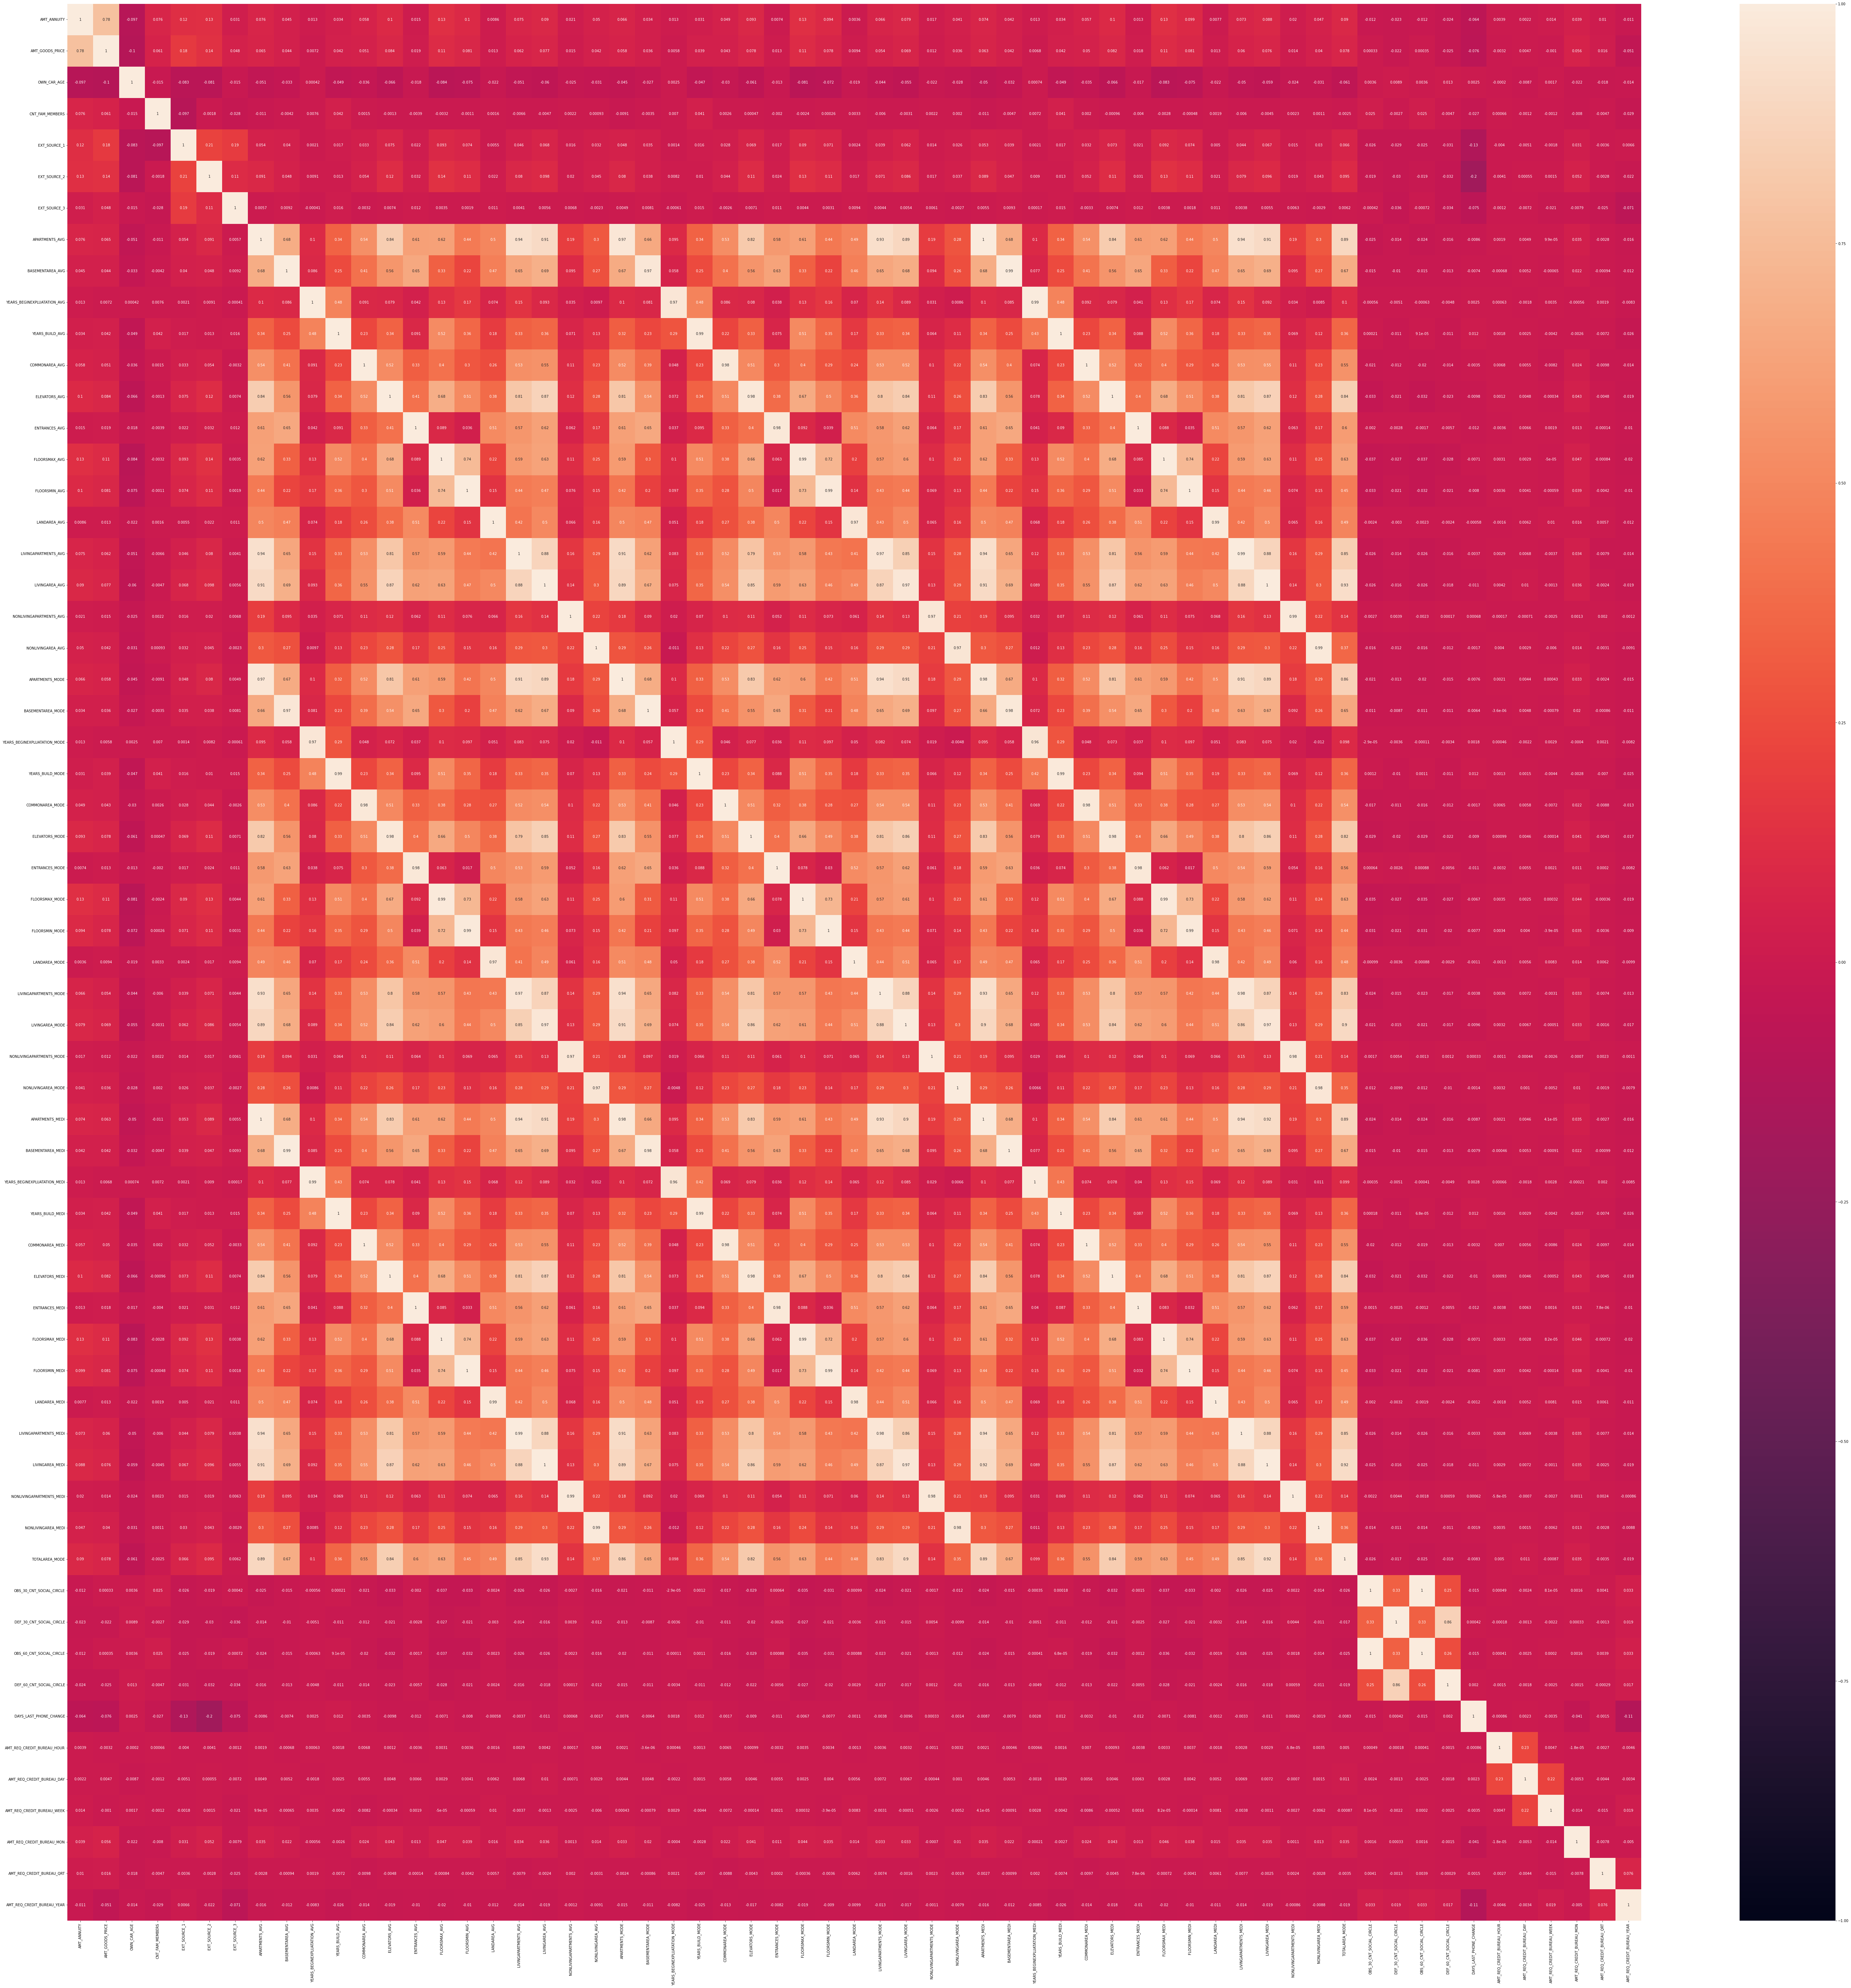

In [30]:
plt.figure(figsize=(100, 100))
sns.heatmap(data_numerical.corr(), vmin=-1, vmax=1, annot=True)

In [73]:
# 找出相關性高於0.7的特徵
matrix = data_numerical.corr()
matrix = matrix.unstack()
matrix = matrix[(matrix>0.7)]
matrix

AMT_ANNUITY                   AMT_ANNUITY                     1.000000
                              AMT_GOODS_PRICE                 0.775109
AMT_GOODS_PRICE               AMT_ANNUITY                     0.775109
                              AMT_GOODS_PRICE                 1.000000
OWN_CAR_AGE                   OWN_CAR_AGE                     1.000000
CNT_FAM_MEMBERS               CNT_FAM_MEMBERS                 1.000000
EXT_SOURCE_1                  EXT_SOURCE_1                    1.000000
EXT_SOURCE_2                  EXT_SOURCE_2                    1.000000
EXT_SOURCE_3                  EXT_SOURCE_3                    1.000000
APARTMENTS_AVG                APARTMENTS_AVG                  1.000000
                              ELEVATORS_AVG                   0.836958
                              LIVINGAPARTMENTS_AVG            0.943952
                              LIVINGAREA_AVG                  0.913619
                              APARTMENTS_MODE                 0.973259
      

In [65]:
# 找出相關性高於0.7的特徵
matrix = data_numerical.corr()
matrix = matrix.unstack()
matrix = matrix[(matrix<1.0) & (matrix>0.7)]

In [32]:
print(matrix)

AMT_ANNUITY                   AMT_GOODS_PRICE                 0.775109
AMT_GOODS_PRICE               AMT_ANNUITY                     0.775109
APARTMENTS_AVG                ELEVATORS_AVG                   0.836958
                              LIVINGAPARTMENTS_AVG            0.943952
                              LIVINGAREA_AVG                  0.913619
                              APARTMENTS_MODE                 0.973259
                              ELEVATORS_MODE                  0.822553
                              LIVINGAPARTMENTS_MODE           0.930554
                              LIVINGAREA_MODE                 0.893463
                              APARTMENTS_MEDI                 0.995081
                              ELEVATORS_MEDI                  0.835123
                              LIVINGAPARTMENTS_MEDI           0.941907
                              LIVINGAREA_MEDI                 0.912330
                              TOTALAREA_MODE                  0.892627
BASEME

In [33]:
# 抽出想要的留下的特徵(numerical),共16個
wantnum =  data_numerical[['AMT_ANNUITY','AMT_GOODS_PRICE','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','LANDAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']]
wantnum.head()

AMT_ANNUITY  AMT_GOODS_PRICE  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      24700.5         351000.0          0.0247            0.0369   
1      35698.5        1129500.0          0.0959            0.0529   
2       6750.0         135000.0             NaN               NaN   
3      29686.5         297000.0             NaN               NaN   
4      21865.5         513000.0             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   
3                          NaN              NaN             NaN   
4                          NaN              NaN             NaN   

   ENTRANCES_AVG  FLOORSMAX_AVG  LANDAREA_AVG  NONLIVINGAPARTMENTS_AVG  \
0         0.0690         0.0833        0.0369                   0.0000   
1         0.0345         0.2917        0.0130                   0.0039   
2            NaN            NaN           NaN                      NaN   
3            NaN            NaN           NaN                      NaN   
4            NaN            NaN           NaN                      NaN   

   NONLIVINGAREA_AVG  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0             0.0000                       2.0                       2.0   
1             0.0098                       1.0                       0.0   
2                NaN                       0.0                       0.0   
3                NaN                       2.0                       0.0   
4                NaN                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
0                       2.0                       2.0  
1                       1.0                       0.0  
2                       0.0                       0.0  
3                       2.0                       0.0  
4                       0.0                       0.0

In [11]:
data_select = data[['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE']]
d = data_select
d.corr()

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE
AMT_ANNUITY         1.000000    0.770138         0.775109
AMT_CREDIT          0.770138    1.000000         0.986968
AMT_GOODS_PRICE     0.775109    0.986968         1.000000

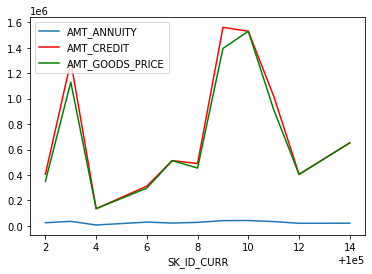

In [53]:
# gca stands for 'get current axis'，gca()是簡稱
ax = plt.gca() 
#x_locator = FixedLocator(range(len(df['name'])+1))
#ax.xaxis.set_major_locator(x_locator)

d.plot(kind='line',x='SK_ID_CURR',y='AMT_ANNUITY',ax=ax) #ax = plt.gca()讓他知道兩張圖要畫在一樣的位置
d.plot(kind='line',x='SK_ID_CURR',y='AMT_CREDIT', color='red',ax=ax) #ax = plt.gca()讓他知道兩張圖要畫在一樣的位置 #分號結束可以不出現一行字(物件名稱)比較美
d.plot(kind='line',x='SK_ID_CURR',y='AMT_GOODS_PRICE', color='green',ax=ax);

In [64]:
d=data[['APARTMENTS_AVG','ELEVATORS_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG']]
d.head(10000)

APARTMENTS_AVG  ELEVATORS_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG
0             0.0247         0.0000                0.0202          0.0190
1             0.0959         0.0800                0.0773          0.0549
2                NaN            NaN                   NaN             NaN
3                NaN            NaN                   NaN             NaN
4                NaN            NaN                   NaN             NaN
5                NaN            NaN                   NaN             NaN
6                NaN            NaN                   NaN             NaN
7                NaN            NaN                   NaN             NaN
8                NaN            NaN                   NaN             NaN
9                NaN            NaN                   NaN             NaN
10               NaN            NaN                   NaN             NaN
11               NaN            NaN                   NaN             NaN
12            0.0825         0.0000                   NaN          0.0778
13            0.1474         0.1600                0.1202          0.1397
14            0.3495         0.4000                0.2849          0.3774
15               NaN            NaN                   NaN             NaN
16               NaN            NaN                   NaN             NaN
17               NaN            NaN                   NaN             NaN
18            0.0278         0.0000                0.0227          0.0290
19               NaN            NaN                   NaN             NaN
20            0.0722         0.0000                0.0588          0.0619
21               NaN            NaN                   NaN             NaN
22            0.0907         0.0000                0.0723          0.0873
23            0.1443         0.1400                0.1173          0.1484
24            0.1433         0.0000                0.1168          0.1217
25            0.0722         0.0000                0.0588          0.0670
26            0.0165         0.0000                   NaN          0.0094
27               NaN            NaN                   NaN             NaN
28               NaN            NaN                   NaN             NaN
29            0.1505         0.1600                0.1210          0.1412
30            0.0124         0.0000                   NaN          0.0149
31            0.3670         0.2800                   NaN          0.2574
32            0.0928         0.0000                   NaN          0.0602
33               NaN            NaN                   NaN             NaN
34            0.0825         0.0000                0.0672          0.0637
35            0.0948         0.0000                   NaN          0.0582
36               NaN            NaN                   NaN             NaN
37               NaN            NaN                   NaN             NaN
38               NaN         0.0400                   NaN          0.0922
39            0.0814         0.0000                0.0656          0.0771
40            0.1309         0.1600                0.1059          0.1267
41               NaN            NaN                   NaN             NaN
42               NaN            NaN                   NaN             NaN
43            0.2186         0.2400                0.1774          0.2113
44               NaN            NaN                   NaN             NaN
45               NaN            NaN                   NaN             NaN
46               NaN            NaN                   NaN             NaN
47               NaN            NaN                   NaN             NaN
48               NaN            NaN                   NaN             NaN
49               NaN            NaN                   NaN             NaN
50            0.0664         0.0800                   NaN          0.0651
51            0.5309         0.8800                   NaN          0.5878
52            0.0227            NaN                   NaN          0.0114
53        